# Spacial statistics

http://r-video-tutorial.blogspot.cz/2015/05/introductory-point-pattern-analysis-of.html

http://www.geoportalpraha.cz/cs/opendata/86489214-950D-4347-941E-C714F5F9E55B

http://nbviewer.jupyter.org/urls/gist.githubusercontent.com/darribas/657e0568df7a63362762/raw/pysal_lisa_maps.ipynb
    
https://github.com/pysal/notebooks

In [1]:
shp_link = "HM_Ekola_ADP_pasma_noc_p_shp/HM_Ekola_ADP_pasma_noc_p.shp"
# shp_link = "HM_hlukochr_valy_p_shp/HM_hlukochr_valy_p.shp"

## Choropleth

In [2]:
import numpy as np
import pysal as ps
import random as rdm
from pysal.contrib.viz import mapping as maps
%matplotlib inline
from pylab import *

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
hr90 = np.array(ps.open(shp_link.replace('.shp', '.dbf')).by_col('DB_HI'))

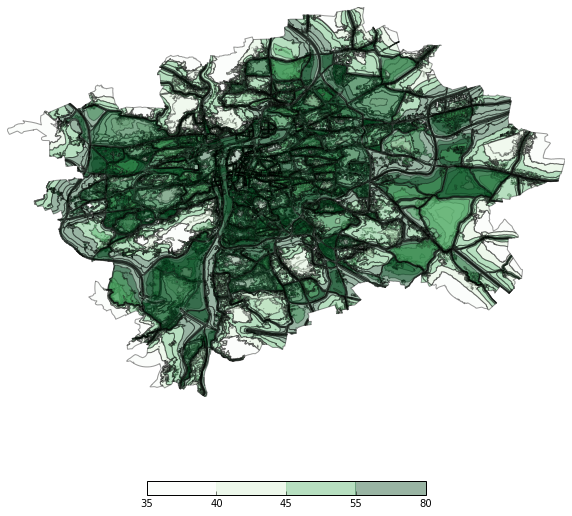

In [4]:
_ = maps.plot_choropleth(shp_link, hr90, 'quantiles', cmap='Greens', figsize=(10, 10))

In [5]:
w = ps.queen_from_shapefile(shp_link)
# lisa = ps.Moran_Local(hr90, w, permutations=1)
gamma = ps.esda.gamma.Gamma(hr90, w)
gamma

Island id:  [18730]


In [ ]:
_ = maps.plot_lisa_cluster(shp_link, gamma, figsize=(9, 6))

In [ ]:
_ = maps.plot_lisa_cluster(shp_link, lisa, figsize=(9, 6))

## Cartopy

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysal as ps
import numpy as np
from pysal.contrib.viz import mapping as maps
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs

In [ ]:
shp = ps.open(shp_link)
bg = cimgt.OSM()

In [ ]:
extent = [shp.bbox[0], shp.bbox[2], shp.bbox[1], shp.bbox[3]]

boros = maps.map_poly_shp(shp)
boros.set_transform(ccrs.Geodetic())
boros.set_facecolor('none')

f = plt.figure(figsize=(12, 10))

ax = plt.axes(projection=bg.crs)
ax.set_extent(extent)
ax.add_image(bg, 11)

ax.add_collection(boros)

plt.show()